In [1]:
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x else 0

assert uniform_pdf(0.2) == 1

In [2]:
def uniform_cdf(x: float) -> float:
    '''Return probability to variable of the uniform system is <= x'''
    if x < 0: return 0 # can't be less than 0
    elif x < 1: return x
    else: return x
    
assert uniform_cdf(0.2) == 0.2

In [3]:
import math

In [4]:
SQRT_TWO_PI = math.sqrt(2 * math.pi)
def normal_pdf(x: float, mi: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mi) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

In [5]:
import matplotlib.pyplot as plt

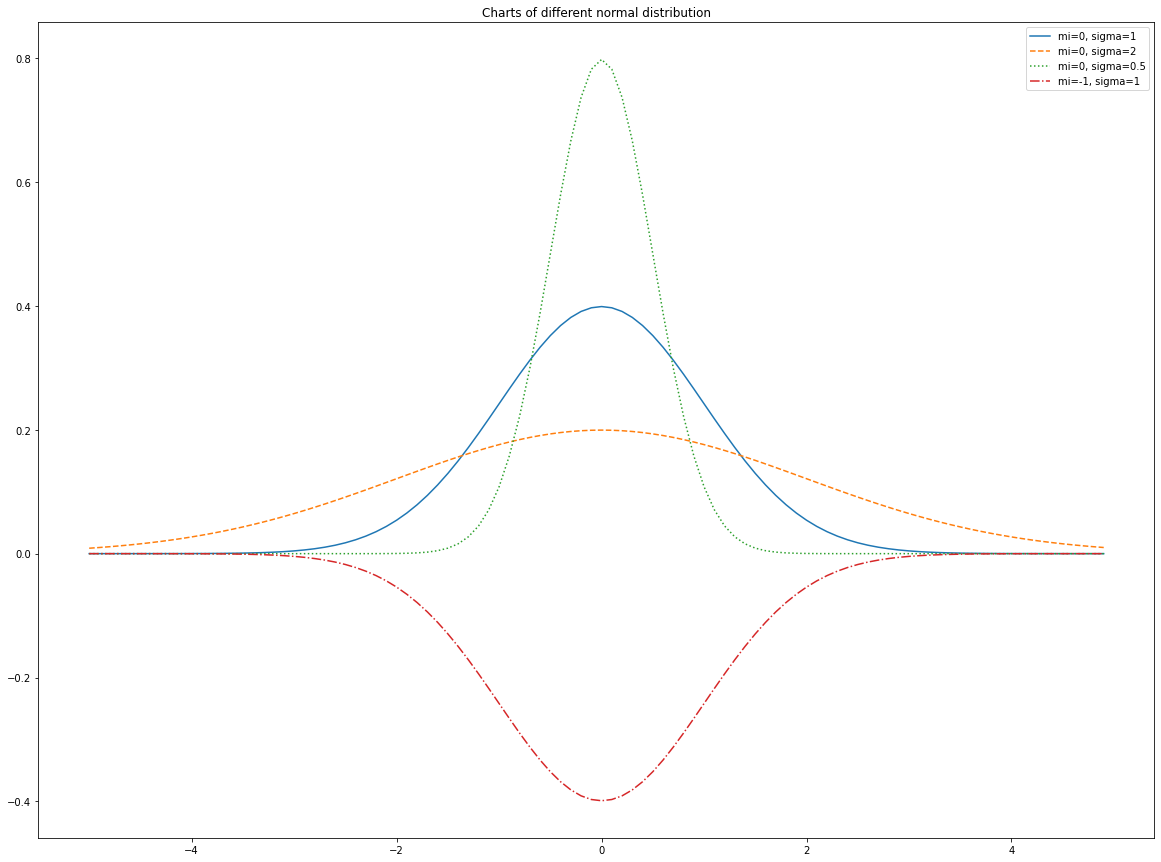

In [6]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.figure(figsize=(20, 15))
plt.plot(xs, [normal_pdf(x,sigma=1) for x in xs], '-', label='mi=0, sigma=1')
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs], '--', label='mi=0, sigma=2')
plt.plot(xs, [normal_pdf(x,sigma=0.5) for x in xs], ':', label='mi=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x,sigma=-1) for x in xs], '-.', label='mi=-1, sigma=1')
plt.legend()
plt.title('Charts of different normal distribution')
plt.show()

In [7]:
def normal_cdf(x: float, mi: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mi) / math.sqrt(2) / sigma)) / 2

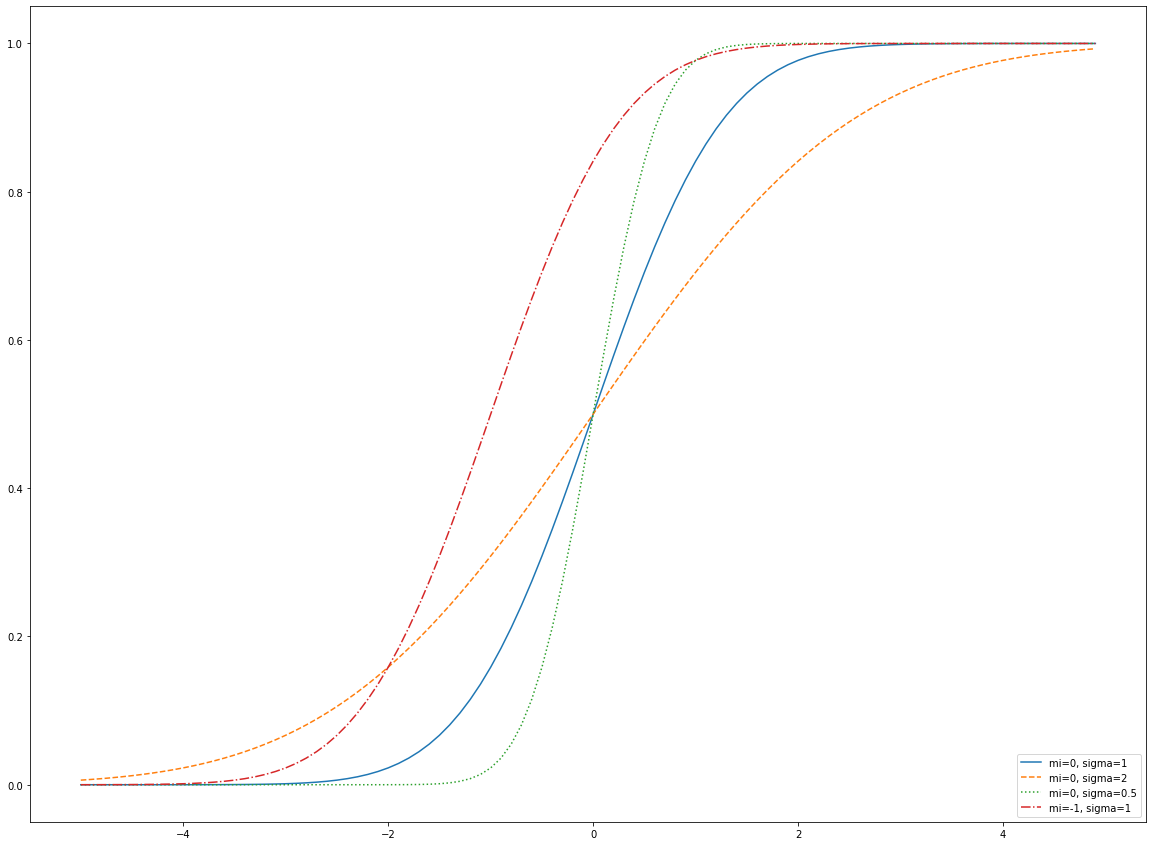

In [8]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.figure(figsize=(20, 15))
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mi=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mi=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mi=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mi=-1) for x in xs], '-.', label='mi=-1, sigma=1')
plt.legend(loc=4)
plt.show()

In [9]:
def inverse_normal_cdf(p: float,
                      mi: float = 0,
                      sigma: float = 1,
                      tolerance: float = 0.00001) -> float:   
    # if distribution is not standard, count standard value
    if mi != 0 or sigma != 1:
        return mi + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0  # normal_cdf(-10) ~ 0
    hi_z = 10.0    # normal_cdf(10) ~ 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            # center point is too low, looking above
            low_z = mid_z
        else:
            # center point is too high, looking below
            hi_z = mid_z
    
    return mid_z
    

In [10]:
def bernoulli_trial(p: float) -> int:
    '''return 1 with probability p and 0 with probability 1 - p'''
    return 1 if random.random() < p else 0

In [11]:
def binomial(n: int, p: float) ->int:
    '''return n-tries Bernoulli'''
    return sum(bernoulli_trial(p) for _ in range(n))

In [12]:
from collections import Counter 
import random

In [13]:
def make_hist(p: float, n: int, num_points: int) -> None:
    data = [binomial(n, p) for _ in range(num_points)]
    
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
           0.8,
           color='0.75')
    
    mi = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mi, sigma) - normal_cdf(i - 0.5, mi, sigma)
         for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial distribution vs standard distribution")
    plt.show()
    

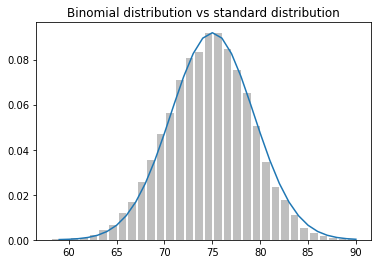

In [14]:
make_hist(0.75, 100, 10000)

In [15]:
from typing import Tuple

In [16]:
import cmath
# thats for nagtive numbers
def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
    '''finding mi and sigma values'''
    mi = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mi, sigma

In [17]:
normal_probability_below = normal_cdf

In [18]:
def normal_probability_above(lo: float,
                            mi: float = 0,
                            sigma: float = 1) -> float:
    return 1 - normal_cdf(lo, mi, sigma)

In [19]:
def normal_probability_between(lo: float,
                              hi: float,
                              mi: float = 0,
                              sigma: float = 1) -> float:
    return normal_cdf(hi, mi, sigma) - normal_cdf(lo, mi, sigma)

In [20]:
def normal_probability_outside(lo: float,
                              hi: float,
                              mi: float = 0,
                              sigma: float = 1) -> float:
    return inverse_normal_cdf(probability, mi, sigma)

In [21]:
def normal_upper_bound(probability: float,
                      mi: float = 0,
                      sigma: float = 1) -> float:
    return inverse_normal_cdf(probability, mi, sigma)

In [22]:
def normal_lower_bound(probability: float,
                      mi: float = 0,
                      sigma: float = 1) -> float:
    return inverse_normal_cdf(1 - probability, mi, sigma)

In [23]:
def normal_two_sided_bounds(probability: float,
                           mi: float = 0,
                           sigma: float = 1) -> Tuple[float, float]:
    '''return symetric limes'''
    tail_probability = (1 - probability) / 2
    
    upper_bound = normal_lower_bound(tail_probability, mi, sigma)
    
    lower_bound = normal_upper_bound(tail_probability, mi, sigma)
    
    return lower_bound, upper_bound

In [24]:
mi_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)

In [25]:
mi_0, sigma_0

(500.0, 15.811388300841896)

In [26]:
lower_bound, upper_bound = normal_two_sided_bounds(0.95, mi_0, sigma_0)

In [27]:
lower_bound.real

469.01026640487555

In [28]:
lo, hi = normal_two_sided_bounds(0.95, mi_0, sigma_0)

In [29]:
mi_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)

In [30]:
mi_1, sigma_1

(550.0, 15.732132722552274)

In [31]:
type_2_probability = normal_probability_between(lo, hi, mi_1, sigma_1)
power = 1 - type_2_probability
power

0.8865480012953671

In [32]:
def two_sided_p_value(x: float, mi: float = 0, sigma: float = 1) -> float:
    if x >= mi:
        # if x > mean
        return 2 * normal_probability_above(x, mi, sigma)
    else:
        # if x < mean
        return 2 * normal_probability_below(x, mi, sigma)
        

In [33]:
two_sided_p_value(529.5, mi_0, sigma_0)

0.06207721579598835

In [34]:
import random
extreme_value_count = 0
for _ in range(1000):
    num_heads = sum(1 if random.random() < 0.5 else 0
                   for _ in range(1000))
    if num_heads >= 530 or num_heads <= 470:
        extreme_value_count += 1
        
assert 59 < extreme_value_count < 65, f"{extreme_value_count}"

AssertionError: 71

In [35]:
two_sided_p_value(531.5, mi_0, sigma_0)

0.046345287837786575

In [36]:
from typing import List

In [37]:
def run_experiment()-> List[bool]:
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment: List[bool]) -> bool:
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                     for experiment in experiments
                     if reject_fairness(experiment)])

assert num_rejections == 46

In [38]:
def estimated_parameters(N: int, n: int) -> Tuple[float, float]:
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

In [39]:
def a_b_test_statistic(N_A: int, n_A: int, N_B: int, n_B: int) -> float:
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

In [40]:
z = a_b_test_statistic(1000, 200, 1000, 180)
z

-1.1403464899034472

In [41]:
two_sided_p_value(z)

0.254141976542236

In [42]:
z = a_b_test_statistic(1000, 200, 1000, 150)
z

-2.948839123097944

In [43]:
two_sided_p_value(z)

0.003189699706216853

In [44]:
def B(alpha: float, beta: float) -> float:
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x: float, alpha: float, beta: float) -> float:
    if x < 0 or x > 1:
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)